# Experiment 1: VUS / Buffer & Step comparison / TSB

## Buffer comparison

### Read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [2]:
project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'vus_buffer_comparison_tsb')
results_path = os.path.join(experiment_path, 'results')

save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(save_fig_path, exist_ok=True)

In [3]:
def load_results(csv_file):
    return pd.read_csv(csv_file, index_col=0)

result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

Number of result files: 30


In [4]:
formal_names = {
    'FF-VUS-PR': 'FF-VUS',
    'FF-VUS-PR-GPU': 'FF-VUS-GPU',
    'AUC-PR': 'AUC',
    'VUS-PR': 'VUS',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC-PR': 'Range-AUC',
}

color_palette = {
    'FF-VUS': '#99cae4',          # Good
    'FF-VUS-GPU': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC': '#84a89c',       # Useless competitors
}

In [5]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)
    
df['Metric'] = df['Metric'].map(formal_names)
# df = df.rename({'Metric': 'Measure', 'Metric time': 'Execution time', 'Slope size': 'Buffer size'}, axis=1)

df.sample(3)

100%|███████████████████████████████████████████| 30/30 [00:00<00:00, 55.68it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Anomalies coordinates time
50672,KDD21/021_UCR_Anomaly_DISTORTEDGP711MarkerLFM5...,11999,1,45.0,2,1.0,True,function,True,dynamic_plus,...,0.000067,0.000184,0.000164,0.000223,0.000085,0.000035,FF-VUS-GPU,0.143800,0.002218,0.000339
2555,OPPORTUNITY/S1-ADL4.test.csv@110.out,32954,2,500.0,32,1.0,True,precomputed,optimized,dynamic_plus,...,0.000081,0.000083,0.000124,0.000499,0.000045,0.000035,FF-VUS,0.031662,0.004493,NaN
53732,YAHOO/YahooA3Benchmark-TS70_data.out,1679,9,1.0,4,1.0,True,precomputed,optimized,dynamic_plus,...,0.000041,0.000084,0.000480,0.000088,0.000029,0.000022,FF-VUS,0.160818,0.001072,NaN


### Buffer figures

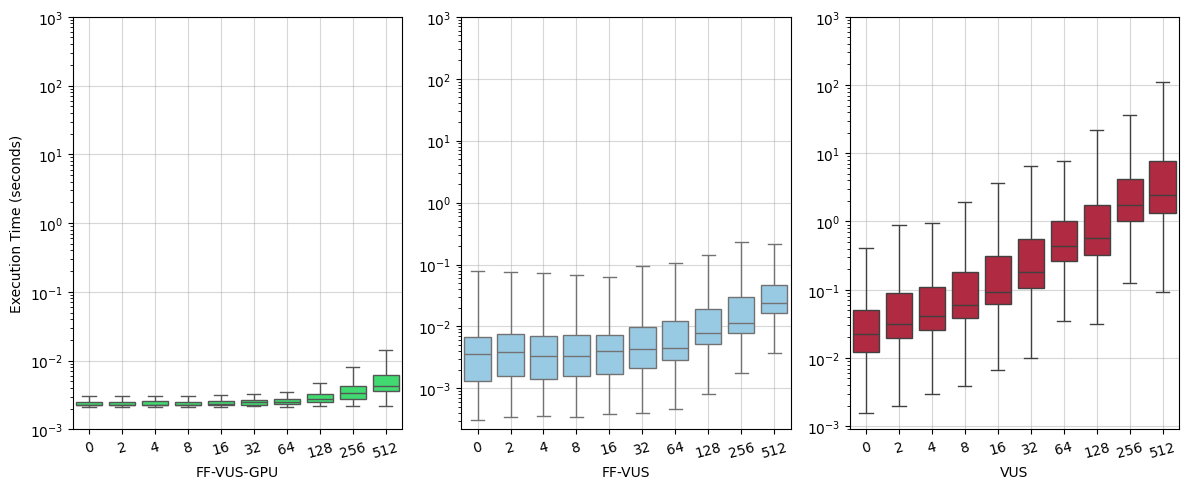

In [12]:
metrics = ['FF-VUS-GPU', 'FF-VUS', 'VUS']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)
    
    sns.boxplot(
        y='Metric time', 
        x='Slope size', 
        data=df[df['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Execution Time (seconds)' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_buffer_comparison_a.svg'))
plt.show()

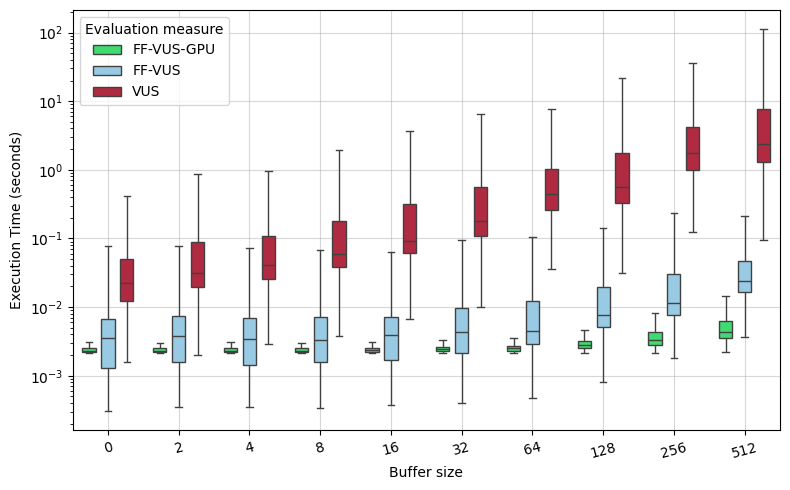

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    y='Metric time', 
    x='Slope size', 
    hue='Metric', 
    data=df, 
    showfliers=False, 
    log_scale=True, 
    palette=color_palette, 
    saturation=1,
    # fill=False, 
    gap=.3,
    # showmeans=True, 
    # meanline=True
)
plt.xlabel('Buffer size')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=15)
plt.grid(axis='both', alpha=0.5)
plt.legend(title='Evaluation measure')
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_buffer_comparison_b.svg'))
plt.show()

## Step analysis

### Read data

In [8]:
project_root_path = os.path.join('..', '..')
step_experiment_path = os.path.join(project_root_path, 'experiments', 'vus_step_comparison_tsb')
step_results_path = os.path.join(step_experiment_path, 'results')

step_save_fig_path = os.path.join(experiment_path, 'figures')
os.makedirs(step_save_fig_path, exist_ok=True)

In [9]:
step_formal_names = {
    'FF-VUS-PR': 'FF-VUS (L: 512)',
    'FF-VUS-PR-GPU': 'FF-VUS-GPU (L: 512)',
    'AUC-PR': 'AUC',
    'VUS-PR': 'VUS (L: 512)',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC-PR': 'Range-AUC',
}

step_color_palette = {
    'FF-VUS (L: 512)': '#99cae4',          # Good
    'FF-VUS-GPU (L: 512)': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS (L: 512)': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC': '#84a89c',       # Useless competitors
}

In [10]:
step_result_files = [file for file in os.listdir(step_results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(step_result_files)}')

Number of result files: 20


In [11]:
# Initialize an empty DataFrame to store the combined data
df_step = pd.DataFrame()

# Read and combine all files
for file in tqdm(step_result_files):
    file_path = os.path.join(step_results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df_step = pd.concat([df_step, curr_df], ignore_index=True)
    
df_step['Metric'] = df_step['Metric'].map(step_formal_names)
df_step.sample(3)

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 80.77it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Anomalies coordinates time
15860,SMD/machine-3-3.test.csv@36.out,23702,26,24.307692,512,32,True,function,True,dynamic_plus,...,0.000070,0.000198,0.000156,0.001232,0.000090,0.000035,FF-VUS-GPU (L: 512),0.339222,0.003309,0.000374
8831,YAHOO/Yahoo_A2synthetic_56_data.out,1420,3,3.000000,512,256,True,function,True,dynamic_plus,...,0.000068,0.000195,0.000156,0.000229,0.000086,0.000036,FF-VUS-GPU (L: 512),0.606991,0.002158,0.000322
14057,SMD/machine-2-3.test.csv@20.out,23688,10,26.900000,512,16,True,precomputed,optimized,dynamic_plus,...,0.001492,0.001364,0.001135,0.005101,0.000088,0.000057,FF-VUS (L: 512),0.466252,0.013383,NaN


### Step figures

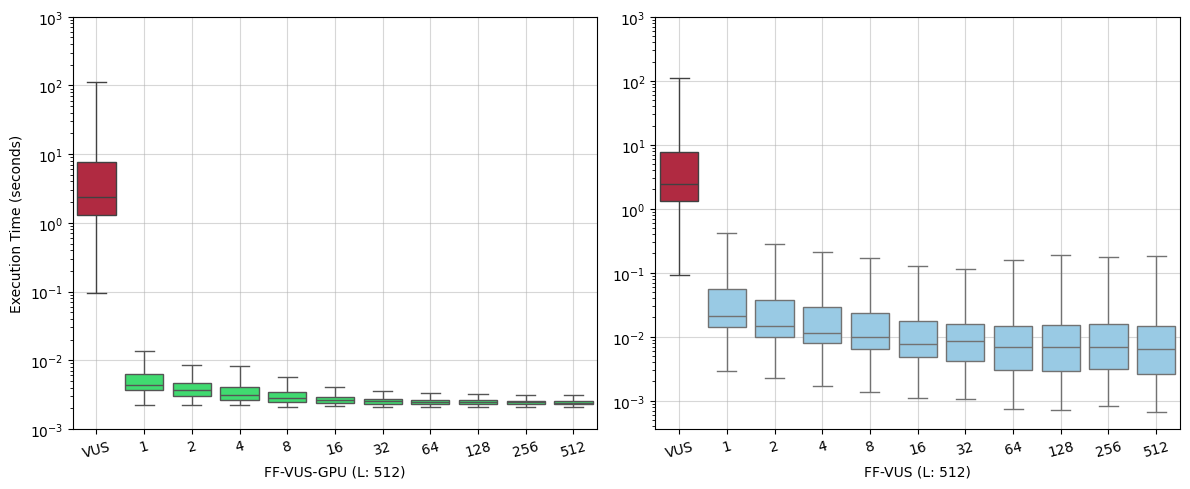

In [14]:
# TODO: Remove vus boxplot and add a dotted line on its average value
# TODO: Merge the two subplots
metrics = ['FF-VUS-GPU (L: 512)', 'FF-VUS (L: 512)']
df_vus_512 = df[np.logical_and(df['Metric'] == 'VUS', df['Slope size'] == 512)]

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)

    sns.boxplot(
        y='Metric time', 
        x='Metric', 
        data=df_vus_512, 
        showfliers=False, 
        log_scale=True,
        color=color_palette['VUS'],
        saturation=1,
        ax=axis
    )
    
    sns.boxplot(
        y='Metric time', 
        x='Step', 
        data=df_step[df_step['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=step_color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Execution Time (seconds)' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(step_save_fig_path, 'exec_time_step_comparison_a.svg'))
plt.show()

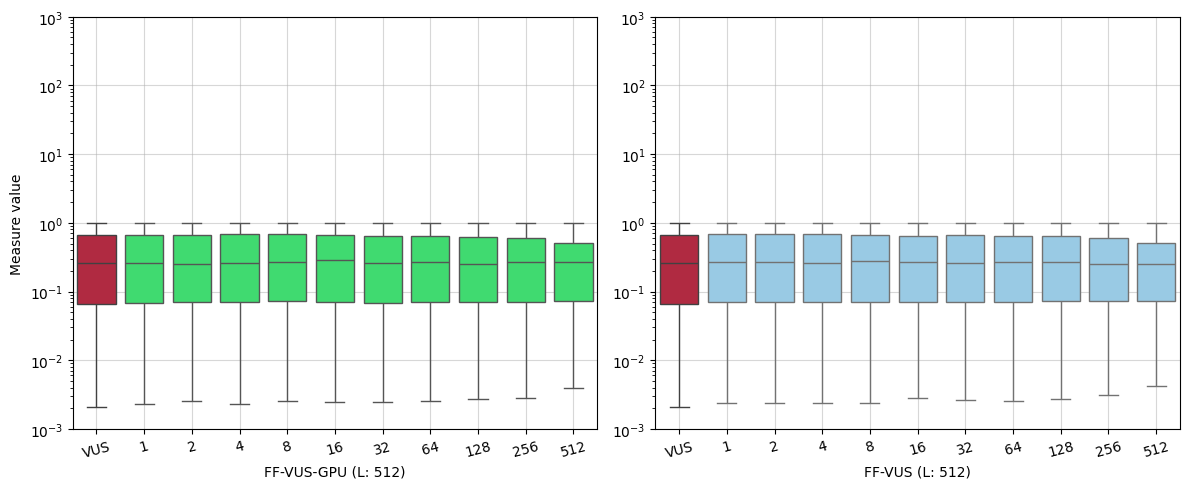

In [15]:
metrics = ['FF-VUS-GPU (L: 512)', 'FF-VUS (L: 512)']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)

    sns.boxplot(
        y='Metric value', 
        x='Metric', 
        data=df_vus_512, 
        showfliers=False, 
        log_scale=True,
        color=color_palette['VUS'],
        saturation=1,
        ax=axis
    )
    
    sns.boxplot(
        y='Metric value', 
        x='Step', 
        data=df_step[df_step['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=step_color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Measure value' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
# plt.savefig(os.path.join(step_save_fig_path, 'exec_time_step_comparison_b.svg'))
plt.show()

In [94]:
# df_step['Value dif. to VUS'] = 
df_vus_512_control = df_vus_512.set_index('Time series')['Metric value']

df_step['Dif. to VUS'] = df_step.progress_apply(lambda row: row['Metric value'] - df_vus_512_control.loc[row['Time series']], axis=1)
df_step.sample(3)

  0%|          | 0/37680 [00:00<?, ?it/s]

,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Anomalies coordinates time,Dif. to VUS
30961,SMD/machine-3-4.test.csv@34.out,23686,8,122.125,512,4,True,function,True,dynamic_plus,...,0.000206,0.000159,0.002775,0.000093,0.000035,FF-VUS-GPU (L: 512),0.261191,0.004905,0.000390,0.109695
18308,GHL/35_Lev_corr_Temp_fault_seed_153_vars_23.te...,200000,2,562.500,512,64,True,precomputed,optimized,dynamic_plus,...,0.000157,0.000260,0.001396,0.000062,0.000049,FF-VUS (L: 512),0.009776,0.031080,NaN,-0.000040
25552,YAHOO/Yahoo_A2synthetic_51_data.out,1420,1,1.000,512,2,True,function,True,dynamic_plus,...,0.000187,0.000154,0.000865,0.000087,0.000034,FF-VUS-GPU (L: 512),0.427054,0.002804,0.000339,0.000005


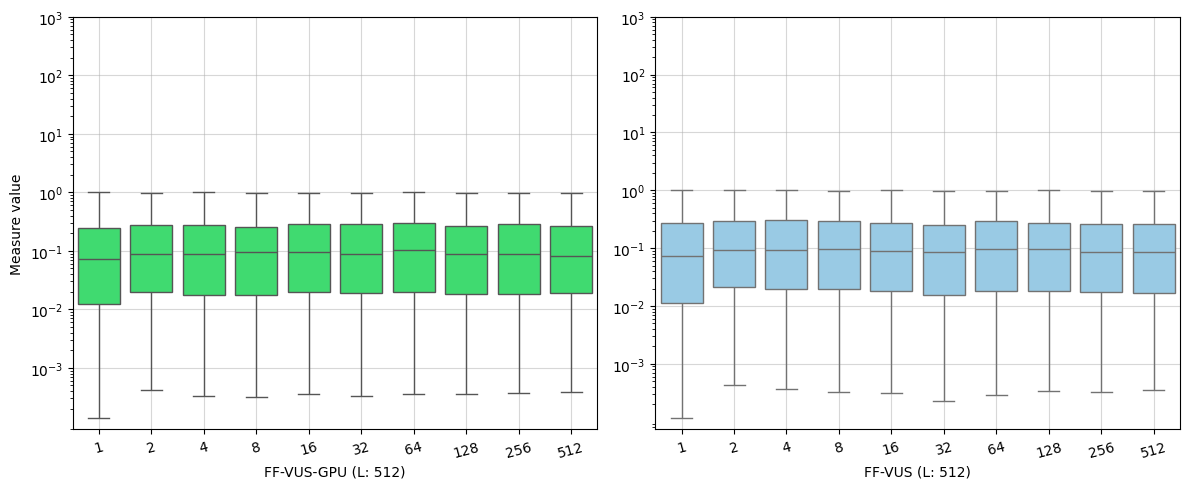

In [95]:
metrics = ['FF-VUS-GPU (L: 512)', 'FF-VUS (L: 512)']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)
    
    sns.boxplot(
        y='Dif. to VUS', 
        x='Step', 
        data=df_step[df_step['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=step_color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Measure value' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(step_save_fig_path, 'exec_time_comparison.svg'))
plt.show()

In [106]:
df[np.logical_and(df['Metric'] == 'FF-VUS', df['Slope size'] == 128)].set_index('Time series')['Metric value'].sort_index()

Time series
Daphnet/S01R02E0.test.csv@1.out        0.075277
Daphnet/S01R02E0.test.csv@4.out        0.259944
Daphnet/S01R02E0.test.csv@6.out        0.198251
Daphnet/S02R01E0.test.csv@3.out        0.145371
Daphnet/S02R01E0.test.csv@4.out        0.287418
                                         ...   
YAHOO/Yahoo_A2synthetic_96_data.out    0.028571
YAHOO/Yahoo_A2synthetic_97_data.out    0.903239
YAHOO/Yahoo_A2synthetic_98_data.out    0.396235
YAHOO/Yahoo_A2synthetic_99_data.out    0.154182
YAHOO/Yahoo_A2synthetic_9_data.out     0.080435
Name: Metric value, Length: 1884, dtype: float64

In [107]:
df[np.logical_and(df['Metric'] == 'VUS', df['Slope size'] == 128)].set_index('Time series')['Metric value'].sort_index()

Time series
Daphnet/S01R02E0.test.csv@1.out        0.068182
Daphnet/S01R02E0.test.csv@4.out        0.069708
Daphnet/S01R02E0.test.csv@6.out        0.050938
Daphnet/S02R01E0.test.csv@3.out        0.186074
Daphnet/S02R01E0.test.csv@4.out        0.182490
                                         ...   
YAHOO/Yahoo_A2synthetic_96_data.out    0.003489
YAHOO/Yahoo_A2synthetic_97_data.out    0.832778
YAHOO/Yahoo_A2synthetic_98_data.out    0.179114
YAHOO/Yahoo_A2synthetic_99_data.out    0.005373
YAHOO/Yahoo_A2synthetic_9_data.out     0.613871
Name: Metric value, Length: 1884, dtype: float64